### Subject of this NoteBook:      Data Wrangling (D_W) 
### Authored by:                   Hafiz Muhammad Asif
### Contact:                       github profile link "OR" email

data munging, is the process of cleaning, transforming, and organizing data in a way that makes it more suitable for analysis. It is a crucial step in the data science process as real-world data is often messy and inconsistent.

## Steps:
1. Geathering Data (Kia)
2. Tools to clean data (Kis sy clean)
3. How to da (Kiasy)
4. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic') 

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.isnull().sum()*100/len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
df.drop(columns='deck', inplace=True)

In [8]:
# df = df.fillna(value =df['age'].mean())
df['age'] = df['age'].fillna(df['age'].mean())

In [9]:
df['embarked'] = df.embarked.fillna(value = df['embarked'].mode()[0])

In [10]:
df['embark_town'] = df.embark_town.fillna(value= df['embark_town'].mode()[0])

In [11]:
df.isnull().sum()* 100/len(df)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outlier Removal
## Visualization Method

<AxesSubplot:xlabel='sex', ylabel='age'>

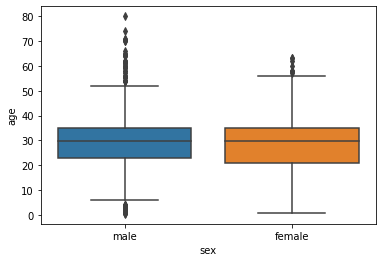

In [12]:
import seaborn as sns
sns.boxplot(data=df, y='age', x='sex')

In [13]:
df.shape

(891, 14)

# IQR Method

In [14]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR =Q3-Q1
IQR
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [15]:
df.shape

(825, 14)

<AxesSubplot:xlabel='age', ylabel='Count'>

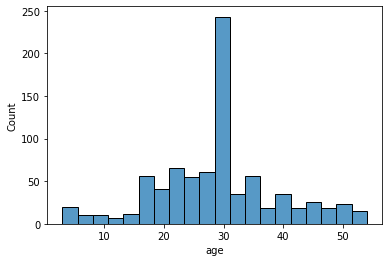

In [16]:
sns.histplot(df['age'])

In [17]:
df.shape

(825, 14)

In [18]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR =Q3-Q1
IQR
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [19]:
df.shape

(718, 14)

<AxesSubplot:xlabel='fare', ylabel='Count'>

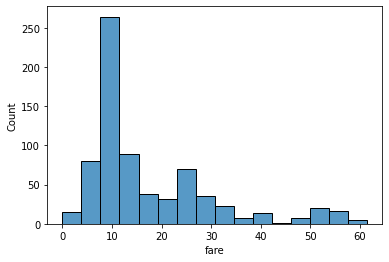

In [20]:
sns.histplot(df['fare'])

In [21]:
# ZScore

In [22]:
# pip install scipy

In [23]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [24]:
import numpy as np
from scipy import stats

zscore = np.abs(stats.zscore(df['age']))
threshold = 3
df = df[(zscore < threshold)]

In [25]:
df.shape

(718, 14)

# Finding Duplicates

In [26]:
df.duplicated().sum()

103

In [27]:
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [28]:
df_duplicates.shape

(103, 14)

# Droping Duplicates

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(615, 14)

In [31]:
# pip install scikit-learn
# 1. Import libraries

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2. Data
df

# 3. select column to normalize
cols_to_normalize = ['age', 'fare'] 

# 4. create the scaler function / tool
scaler =MinMaxScaler()

# 5. fit and transform the dataon scaler or vise versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6. Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [32]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [33]:
# 1. Import libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. Data
df

# 3. select column to normalize
cols_to_normalize = ['age', 'fare'] 

# 4. create the scaler function / tool
scaler =StandardScaler()

# 5. fit and transform the dataon scaler or vise versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6. Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [34]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


# Log Transmition

In [35]:
kashti = sns.load_dataset('titanic')
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
# Log Transmition
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

In [37]:
kashti['age'] = np.log(kashti['age'])
kashti['fare']= np.log(kashti['fare'])
kashti.head()

c:\Users\Al HAfiz Enterprises\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='fare'>

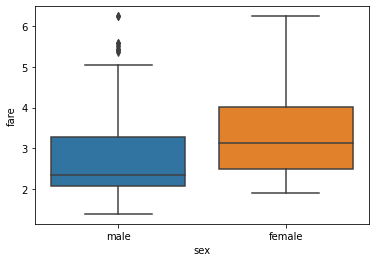

In [38]:
sns.boxplot(data=kashti, x="sex", y='fare')

<AxesSubplot:xlabel='age', ylabel='Count'>

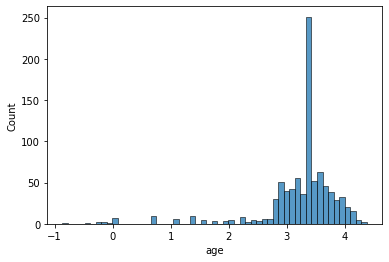

In [39]:
sns.histplot(kashti['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

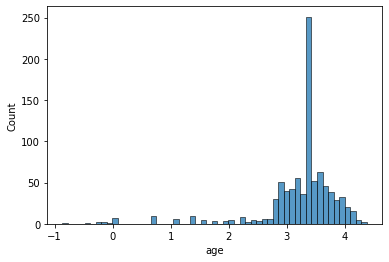

In [40]:
sns.histplot(kashti['age'])

In [41]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# Organizing the Data

In [42]:
df['family_size'] = df['sibsp']+df['parch']

<AxesSubplot:xlabel='family_size', ylabel='Count'>

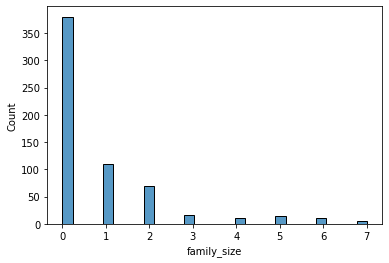

In [43]:
sns.histplot(df['family_size'])

c:\Users\Al HAfiz Enterprises\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Al HAfiz Enterprises\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

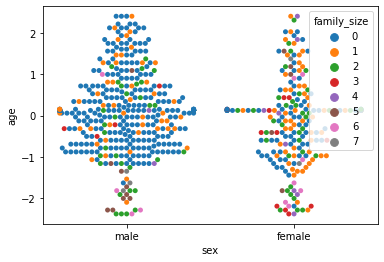

In [44]:
sns.swarmplot(data=df, x="sex", y="age", hue="family_size")

In [45]:
df = df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [46]:
table = pd.pivot_table(df, values='fare', index='pclass', 
                 columns="survival", aggfunc=np.sum)
table

survival,0,1
pclass,,
1,47.098956,86.811732
2,-1.053066,13.921025
3,-109.690971,-37.087677


<AxesSubplot:xlabel='fare', ylabel='age'>

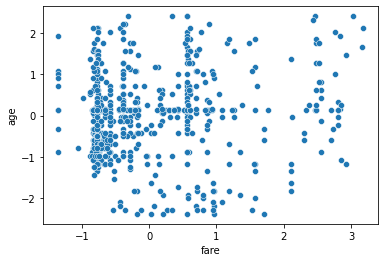

In [47]:
sns.scatterplot(data=df, x="fare", y="age")

In [48]:
df['family_size'] = df['sibsp']+df['parch']

In [49]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True,0


# Saving the wrangleed data

In [50]:
df.to_csv("pre-rocess_data.csv")

<AxesSubplot:xlabel='fare', ylabel='age'>

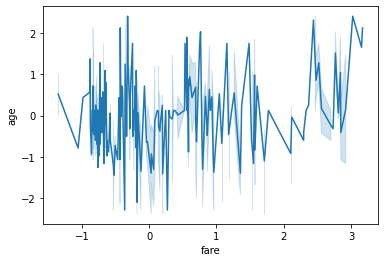

In [51]:
sns.lineplot(data=df, x='fare', y="age")

<AxesSubplot:xlabel='family_size', ylabel='age'>

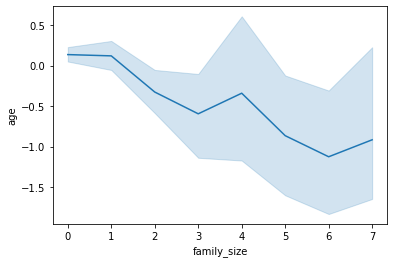

In [52]:
sns.lineplot(data=df, x='family_size', y="age")

## Here the Command to Convert Python to PDF via nbconvert

In [53]:
# !jupyter nbconvert --to pdf Data_Wrangling.ipynb

In [54]:
# pip install --upgrade nbconvert ipython